## **Importation du corpus Sephora**

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns

In [44]:
corpus_sephora1 = pd.read_csv("C:/Users/a.tekiouk/Sujet_2/Sujet_2/DATA/corpus_sephora.csv",sep=";", error_bad_lines=False)
corpus_sephora1.head()

C:\Users\a.tekiouk\AppData\Local\Temp\ipykernel_26436\1529736055.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  corpus_sephora1 = pd.read_csv("C:/Users/a.tekiouk/Sujet_2/Sujet_2/DATA/corpus_sephora.csv",sep=";", error_bad_lines=False)


,post_id,text,publication_time,collection_time,comments,likes,language
0,17902879820742557,I love so much my collections from rarebeauty ...,2023-03-02 11:21:40+00:00,2023-03-02 14:08:55.328483+00:00,4,0,en
1,18108863101296002,Absolutely stunning✨\n.\n.\n\n#makeuplooks #ma...,2023-02-28 20:40:39+00:00,2023-03-02 14:08:55.328483+00:00,19,980,en
2,17845549664938623,The tea is HOT! Did you know that these 4 big ...,2023-03-02 07:37:34+00:00,2023-03-02 14:08:55.329481+00:00,7,1555,en
3,17947486076531533,777 💌 #greeneyes #sunkissed #grannyhair #curly...,2023-02-28 17:44:23+00:00,2023-03-02 14:08:55.330465+00:00,52,3534,en
4,17965335578263008,Bugün Highlighter önerisiyle geldiimm 🥳\n\nRev...,2023-03-01 16:36:15+00:00,2023-03-02 14:08:55.330465+00:00,29,44,tr


In [7]:
corpus_sephora3k = pd.read_csv("C:/Users/a.tekiouk/Sujet_2/Sujet_2/DATA/corpus_sephora3k.csv",sep=";", error_bad_lines=False)
corpus_sephora3k.head()

C:\Users\a.tekiouk\AppData\Local\Temp\ipykernel_43272\2805413776.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  corpus_sephora3k = pd.read_csv("C:/Users/a.tekiouk/Sujet_2/Sujet_2/DATA/corpus_sephora3k.csv",sep=";", error_bad_lines=False)


,post_id,text,publication_time,collection_time,comments,likes,language
0,18108863101296002,Absolutely stunning✨\n.\n.\n\n#makeuplooks #ma...,2023-02-28 20:40:39+00:00,2023-03-03 10:49:21.595496+00:00,22,1201,en
1,17973798661959293,¡Buenas noches! ✨\n\nHoy os traigo un post con...,2023-02-24 19:30:00+00:00,2023-03-03 10:49:21.597614+00:00,221,503,es
2,17997799147728332,Selammm🌸\n\nSephora gloss kullananlar yorumlar...,2023-03-03 08:26:08+00:00,2023-03-03 10:49:21.598609+00:00,6,85,tr
3,17978454428051718,Swatches de la palette Pro Pigment Volume 3 de...,2023-03-02 16:45:48+00:00,2023-03-03 10:49:21.599606+00:00,1,708,en
4,18022839631495044,full glam to sit in my dressing gown & I’d hav...,2023-03-01 19:25:08+00:00,2023-03-03 10:49:21.600604+00:00,56,1680,en


format publication time/collection time : *`YYYY-MM-DD HH:MM:SS+00:00`*

In [4]:
corpus_sephora3k.shape

(2827, 7)

In [5]:
corpus_sephora3k[['comments','likes']].describe()

,comments,likes
count,2827.000000,2827.000000
mean,45.510435,975.194906
std,582.241530,5413.955870
min,0.000000,0.000000
25%,1.000000,6.000000
50%,5.000000,63.000000
75%,24.000000,615.000000
max,29116.000000,212016.000000


<Axes: >

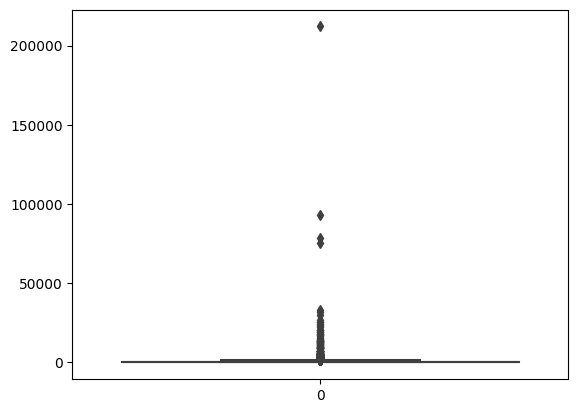

In [6]:
sns.boxplot(corpus_sephora3k['likes'])

<Axes: >

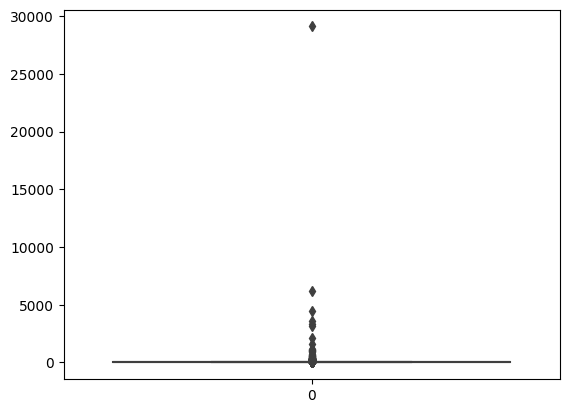

In [7]:
sns.boxplot(corpus_sephora3k['comments'])

In [8]:
corpus_sephora3k['language'].unique()

array(['en', 'es', 'tr', 'id', 'pl', 'fr', 'el', 'af', 'ca', 'nl', 'it',
       'pt', 'ar', 'hr', 'tl', 'de', 'fi', 'uk', 'et', nan, 'ja', 'sv',
       'ko', 'no', 'fa', 'sk', 'ru', 'sl', 'ro', 'da', 'so', 'cs', 'th',
       'lt', 'he', 'bg', 'vi'], dtype=object)

## **Preprocessing**

In [3]:
import re 
import cleantext
import emoji

In [8]:
text = corpus_sephora3k['text']

In [10]:
hashtags = [tag.lower() for tag in re.findall('#[^#\\s]+', text) if tag[1:].isalnum()]

TypeError: expected string or bytes-like object

In [9]:
clean_text = re.sub("@[A-Za-z0-9_]+","", text)
clean_text = re.sub("#[A-Za-z0-9_]+","", clean_text)

print(clean_text)

TypeError: expected string or bytes-like object

In [48]:
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U0001F1F2-\U0001F1F4"  # Macau flag
        u"\U0001F1E6-\U0001F1FF"  # flags
        u"\U0001F600-\U0001F64F"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U0001F1F2"
        u"\U0001F1F4"
        u"\U0001F620"
        u"\u200d"
        u"\u2640-\u2642"
        "]+", flags=re.UNICODE)

clean_text = emoji_pattern.sub(r'', clean_text)
print(clean_text)

Absolutely stunning
.
.

                     


#ad ou #sponsored
ou détecter les post sponso

## **spaCy**

In [2]:
import spacy
from spacy.lang.en import English

In [3]:
nlp = spacy.load("en_core_web_sm")
doc =nlp("This is 2 #sentence.")
span = doc[1:3]

In [4]:
for token in doc:
     print(token.text, token.pos_, token.i)

This PRON 0
is AUX 1
2 NUM 2
# NOUN 3
sentence NOUN 4
. PUNCT 5


In [18]:
with doc.retokenize() as retokenizer:
    a = retokenizer.merge(doc[3:5])
print(a)

None


#sentence


In [12]:
print("Index :   ", [token.i for token in doc])
print("Text :    ", [token.text for token in doc])
print("is_alpha :", [token.is_alpha for token in doc])
print("is_punct :", [token.is_punct for token in doc])
print("like_num :", [token.like_num for token in doc])

Index :    [0, 1, 2, 3, 4]
Text :     ['This', 'is', '2', 'sentence', '.']
is_alpha : [True, True, False, True, False]
is_punct : [False, False, False, False, True]
like_num : [False, False, True, False, False]


Labels

`python -m spacy download fr_core_news_sm`

In [13]:
nlp = spacy.load("fr_core_news_sm")

In [14]:
doc = nlp("J'ai mangé McDonalds à Paris")

In [15]:
for token in doc:
    print(token.text, token.pos_, token.dep_,token.head.text)

J' PRON nsubj mangé
ai AUX aux:tense mangé
mangé VERB ROOT mangé
McDonalds PROPN xcomp mangé
à ADP case Paris
Paris PROPN obl:mod mangé


In [16]:
for ent in doc.ents:
    print(ent.text, ent.label_)

McDonalds ORG
Paris LOC


In [17]:
#Explicaiton des labels

In [18]:
spacy.explain("GPE")

'Countries, cities, states'

In [19]:
spacy.explain("PROPN")

'proper noun'

In [20]:
spacy.explain("ADP")

'adposition'

Matcher

In [21]:
from spacy.matcher import Matcher

In [22]:
# Charge un pipeline et crée l'objet nlp
nlp = spacy.load("fr_core_news_sm")

In [23]:
# Initialise le matcher avec le vocabulaire partagé
matcher = Matcher(nlp.vocab)


In [24]:
# Ajoute le motif au matcher
pattern = [{"TEXT": "iPhone"}, {"TEXT": "12"}]
matcher.add("IPHONE_PATTERN", [pattern])


In [25]:
# Traite un texte
doc = nlp("La date de sortie du futur iPhone 12 a fuité")

In [26]:
# Appelle le matcher sur le doc
matches = matcher(doc)

In [27]:
# Itère sur les correspondances
for match_id, start, end in matches:
    # Obtiens le span en correspondance
    matched_span = doc[start:end]
    print(matched_span.text)

iPhone 12


Test de la pre-trained pipeline sur le corpus sephora

In [46]:
nlp = spacy.load("fr_core_news_sm")
text = corpus_sephora1[corpus_sephora1['language'] == 'fr']['text']
for i in text:
    doc = nlp(i)
    for token in doc:
        print(token.text, token.pos_)
    for ent in doc.ents:
          print(ent.text, ent.label_)
    print("-----------------------------------------------------------------")

imane__htb ADJ
& CCONJ
imanehglams ADJ
💫 ADJ


 SPACE
# AUX
caricature NOUN
# AUX
caricatureartist ADJ
# PROPN
caricatureart NOUN
# PROPN
portrait ADJ
# AUX
portaitphotography ADJ
# ADJ
portraitcartoon ADJ
# AUX
cartoon NOUN
# PROPN
illustration NOUN
# AUX
dessinnumerique ADJ
# AUX
tablettegraphique ADJ
# AUX
graphisme NOUN
# PROPN
graphiste NOUN
# X
lyon PROPN
# PROPN
lyonnaise ADJ
# PROPN
majeup NOUN
# AUX
makeupaddict NOUN
# ADJ
maquilleuse ADJ
# AUX
maccosmeticsfrance NOUN
# PROPN
hudabeauty NOUN
# AUX
sephora PROPN
# AUX
makeupforever VERB
# PROPN
tartecosmetics ADJ
# ADJ
toofacedcosmetics ADJ
# AUX
maquillagemariee NOUN
# PROPN
maquillageinvitée VERB
# PROPN
majeupartist NOUN
imane__htb & imanehglams ORG
-----------------------------------------------------------------
Hello PROPN
la DET
team NOUN
insta PROPN
j’ PROPN
espère VERB
que SCONJ
vous PRON
allez VERB
🥰 ADV


 SPACE
Je PRON
vous PRON
parle VERB
aujourd’hui VERB
d’ ADV
un DET
produit NOUN
miraculeux ADJ
de ADP
chez ADP
SE

octolyfr NOUN
benefitfrance NOUN
sephora X

 SPACE
💛 ADJ
👉 ADJ
Coucou PROPN
je PRON
vous PRON
partage VERB
mon DET
ressenti NOUN
concernant VERB
LA DET
MOUSSE NOUN
TONIQUE NOUN
LISSANTE ADJ
POUR ADP
LES DET
PORES NOUN
AUXCAHA PROPN
ET CCONJ
PHA NOUN
de ADP
benefitfrance NOUN
👈 ADJ
💛 PROPN


 SPACE
👉 ADV
💛 PROPN
MINIMISE PROPN
L' DET
APPARENCE NOUN
DES ADP
PORES NOUN
💛 PROPN
👈 PRON

  SPACE
✔ NOUN
Resserre PROPN
l' DET
apparence NOUN
des ADP
pores ADJ
instantanément VERB
et CCONJ
à ADP
long ADJ
terme NOUN
✔ NOUN

  SPACE
✔ NOUN
AHA PROPN
et CCONJ
PHA NOUN
aidant VERB
à ADP
l' DET
exfolation NOUN
✔ NOUN

  SPACE
✔ NOUN
Mousse X
à ADP
absorption NOUN
rapide ADJ
, PUNCT
facilement ADV
applicable ADJ
au ADP
doigt NOUN
✔ NOUN


 SPACE
👉 ADV
💛 PROPN
INGRÉDIENTS NOUN
CLÉS PROPN
💛 PROPN
👈 NUM

  SPACE
✔ NOUN
Des DET
acides NOUN
alpha NOUN
- ADV
hydroxyles NOUN
( PUNCT
AHA NOUN
) PUNCT
et CCONJ
polyhydroxyles ADJ
( PUNCT
PHA NOUN
) PUNCT
pour ADP
aider VERB
à ADP
exfolier VERB
la DET
peau NOUN
e

6      imane__htb & imanehglams 💫\n\n#caricature #car...
21     Hello la team insta j’espère que vous allez 🥰\...
29     ✨Soin ✨ \n\nPetit instant tranquille pour pren...
47     ~ anastasiabeverlyhills \n.\n.\n🔸 Parlons #ant...
48     💙 HELLO mes ChouX 💙 j’espère que vous allez bi...
58     octolyfr benefitfrance sephora \n👉Coucou je vo...
73     octolyfr benefitfrance sephora \n💛👉Coucou je v...
78     🌸 Byoma 🌸 \n\nJe remercie byoma et sephorafran...
97     Premier coup de cœur rouge à lèvres de 2023: L...
100    Cette année encore et pour le je ne sais combi...
121    Le STARLAA de benefitfrance je l'adore tu vois...
156                               𝐘𝐨𝐮 𝐝𝐨 𝐲𝐨𝐮.🍋 #guerlain
179    Woa 😱. Il est trop facile de prendre le RDV 💅 ...
Name: text, dtype: object


## Top2Vec

In [50]:
from top2vec import Top2Vec

In [51]:
for lang in set(corpus_sephora3k['language']): 
    print(lang) 

ru
ro
id
ko
de
bg
lt
nan
da
he
sv
th
en
cs
ar
ca
ja
sk
it
so
uk
et
hr
es
fr
tr
pl
pt
no
vi
nl
fi
sl
tl
af
fa
el


In [52]:
text_test = corpus_sephora3k[corpus_sephora3k['language'] == 'en']['text'].tolist()

In [53]:
len(text_test)

1992

In [35]:
model = Top2Vec(documents=text_test, speed="learn", workers=8, min_count = 10, embedding_model = "universal-sentence-encoder")


2023-03-08 10:25:51,389 - top2vec - INFO - Pre-processing documents for training
C:\Users\a.tekiouk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
2023-03-08 10:25:51,971 - top2vec - INFO - Downloading universal-sentence-encoder model
2023-03-08 10:26:00,669 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2023-03-08 10:26:02,162 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2023-03-08 10:26:15,796 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-03-08 10:26:15,888 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics



**Parameters**  
    ----------
    **documents**: List of str  
        Input corpus, should be a list of strings.  
    **min_count**: int (Optional, default 50)  
        Ignores all words with total frequency lower than this. For smaller  
        corpora a smaller min_count will be necessary.  
    **ngram_vocab**: bool (Optional, default False)  
        Add phrases to topic descriptions.  
        Uses gensim phrases to find common phrases in the corpus and adds them  
        to the vocabulary.  
        For more information visit:  
        https://radimrehurek.com/gensim/models/phrases.html  
    **ngram_vocab_args**: dict (Optional, default None)  
        Pass custom arguments to gensim phrases.  
        For more information visit:  
        https://radimrehurek.com/gensim/models/phrases.html  
    **embedding_model**: string or callable  
        This will determine which model is used to generate the document and  
        word embeddings. The valid string options are:  
            * doc2vec  
            * universal-sentence-encoder  
            * universal-sentence-encoder-large  
            * universal-sentence-encoder-multilingual  
            * universal-sentence-encoder-multilingual-large  
            * distiluse-base-multilingual-cased  
            * all-MiniLM-L6-v2  
            * paraphrase-multilingual-MiniLM-L12-v2  
        For large data sets and data sets with very unique vocabulary doc2vec  
        could produce better results. This will train a doc2vec model from  
        scratch. This method is language agnostic. However multiple languages  
        will not be aligned.  
        Using the universal sentence encoder options will be much faster since  
        those are pre-trained and efficient models. The universal sentence  
        encoder options are suggested for smaller data sets. They are also  
        good options for large data sets that are in English or in languages  
        covered by the multilingual model. It is also suggested for data sets  
        that are multilingual.  
        For more information on universal-sentence-encoder options visit:  
        https://tfhub.dev/google/collections/universal-sentence-encoder/1  
        The SBERT pre-trained sentence transformer options are  
        distiluse-base-multilingual-cased,  
        paraphrase-multilingual-MiniLM-L12-v2, and all-MiniLM-L6-v2.  
        The distiluse-base-multilingual-cased and  
        paraphrase-multilingual-MiniLM-L12-v2 are suggested for multilingual  
        datasets and languages that are not  
        covered by the multilingual universal sentence encoder. The  
        transformer is significantly slower than the universal sentence  
        encoder options(except for the large options).  
        For more information on SBERT options visit:  
        https://www.sbert.net/docs/pretrained_models.html  
        If passing a callable embedding_model note that it will not be saved  
        when saving a top2vec model. After loading such a saved top2vec model  
        the set_embedding_model method will need to be called and the same  
        embedding_model callable used during training must be passed to it.  
    embedding_model_path: string (Optional)  
        Pre-trained embedding models will be downloaded automatically by  
        default. However they can also be uploaded from a file that is in the  
        location of embedding_model_path.  
        Warning: the model at embedding_model_path must match the  
        embedding_model parameter type.  
    embedding_batch_size: int (default=32)  
        Batch size for documents being embedded.  
    **split_documents**: bool (default False)  
        If set to True, documents will be split into parts before embedding.  
        After embedding the multiple document part embeddings will be averaged  
        to create a single embedding per document. This is useful when documents  
        are very large or when the embedding model has a token limit.  
        Document chunking or a senticizer can be used for document splitting.  
    **document_chunker**: string or callable (default 'sequential')  
        This will break the document into chunks. The valid string options are:  
            * sequential  
            * random  
        The sequential chunker will split the document into chunks of specified  
        length and ratio of overlap. This is the recommended method.  
        The random chunking option will take random chunks of specified length  
        from the document. These can overlap and should be thought of as  
        sampling chunks with replacement from the document.  
        If a callable is passed it must take as input a list of tokens of  
        a document and return a list of strings representing the resulting  
        document chunks.  
        Only one of document_chunker or sentincizer should be used.  
    **chunk_length**: int (default 100)  
        The number of tokens per document chunk if using the document chunker  
        string options.  
    **max_num_chunks**: int (Optional)  
        The maximum number of chunks generated per document if using the  
        document chunker string options.  
    **chunk_overlap_ratio**: float (default 0.5)  
        Only applies to the 'sequential' document chunker.  
        Fraction of overlapping tokens between sequential chunks. A value of  
        0 will result i no overlap, where as 0.5 will overlap half of the  
        previous chunk.  
    **chunk_len_coverage_ratio**: float (default 1.0)  
        Only applies to the 'random' document chunker option.  
        Proportion of token length that will be covered by chunks. Default  
        value of 1.0 means chunk lengths will add up to number of tokens of  
        the document. This does not mean all tokens will be covered since  
        chunks can be overlapping.  
    **sentencizer**: callable (Optional)  
        A sentincizer callable can be passed. The input should be a string  
        representing the document and the output should be a list of strings  
        representing the document sentence chunks.  
        Only one of document_chunker or sentincizer should be used.  
    **speed**: string (Optional, default 'learn')  
        This parameter is only used when using doc2vec as embedding_model.  
        It will determine how fast the model takes to train. The  
        fast-learn option is the fastest and will generate the lowest quality  
        vectors. The learn option will learn better quality vectors but take  
        a longer time to train. The deep-learn option will learn the best  
        quality vectors but will take significant time to train. The valid  
        string speed options are:  
            * fast-learn  
            * learn  
            * deep-learn  
    **use_corpus_file**: bool (Optional, default False)  
        This parameter is only used when using doc2vec as embedding_model.  
        Setting use_corpus_file to True can sometimes provide speedup for  
        large datasets when multiple worker threads are available. Documents  
        are still passed to the model as a list of str, the model will create  
        a temporary corpus file for training.  
    **document_ids**: List of str, int (Optional)  
        A unique value per document that will be used for referring to  
        documents in search results. If ids are not given to the model, the  
        index of each document in the original corpus will become the id.  
    **keep_documents**: bool (Optional, default True)  
        If set to False documents will only be used for training and not saved  
        as part of the model. This will reduce model size. When using search  
        functions only document ids will be returned, not the actual  
        documents.  
    workers: int (Optional)  
        The amount of worker threads to be used in training the model. Larger  
        amount will lead to faster training.  
    **tokenizer**: callable (Optional, default None)  
        Override the default tokenization method. If None then  
        gensim.utils.simple_preprocess will be used.  
        Tokenizer must take a document and return a list of tokens.  
    **use_embedding_model_tokenizer**: bool (Optional, default False)  
        If using an embedding model other than doc2vec, use the model's  
        tokenizer for document embedding. If set to True the tokenizer, either  
        default or passed callable will be used to tokenize the text to  
        extract the vocabulary for word embedding.  
    **umap_args**: dict (Optional, default None)  
        Pass custom arguments to UMAP.  
    **hdbscan_args**: dict (Optional, default None)  
        Pass custom arguments to HDBSCAN.  
    **verbose**: bool (Optional, default True)  


In [37]:
topic_size,topic_nums = model.get_topic_sizes()
print(topic_size,topic_nums)

[1412   87   75   64   59   57   50   48   46   43   28   23] [ 0  1  2  3  4  5  6  7  8  9 10 11]


In [38]:
# top 10 topics
topic_words, word_scores, topic_nums = model.get_topics(2)

In [39]:
for words,scores,num in zip(topic_words, word_scores, topic_nums):
    print(num)
    print(f"Words : {words}")
    print(scores)

0
Words : ['sephora' 'nars' 'inglot' 'thebalm' 'ulta' 'colourpop' 'kvd' 'fotd'
 'eyeshadows' 'lancome' 'mua' 'maquillage' 'smashbox' 'glossier' 'morphe'
 'maquillaje' 'laneige' 'covergirl' 'lakme' 'makeup' 'lipliner' 'swatches'
 'lipsticks' 'dior' 'glowy' 'eyeshadow' 'eyemakeup' 'cosmetics' 'ysl'
 'glam' 'lipgloss' 'maybelline' 'revlon' 'esthetician' 'makeupaddiction'
 'kryolan' 'bronzer' 'mascara' 'abh' 'palettes' 'niacinamide' 'glycolic'
 'teint' 'fenty' 'retinol' 'loreal' 'concealer' 'lipbalm' 'shimmer'
 'eyeliner']
[0.6158143  0.5471313  0.53579396 0.5339259  0.53383505 0.531186
 0.53070045 0.4999835  0.48640674 0.48321205 0.4791883  0.47893798
 0.45670205 0.4506554  0.44559297 0.43990332 0.4337236  0.4316788
 0.43003857 0.4266153  0.41358578 0.40893602 0.4047106  0.40174913
 0.4003061  0.39345628 0.39013886 0.38924718 0.3867538  0.38646814
 0.38308    0.37151605 0.3710363  0.36829945 0.3663141  0.36362147
 0.35851496 0.35481596 0.35013658 0.34527785 0.3443039  0.3413571
 0.3391798

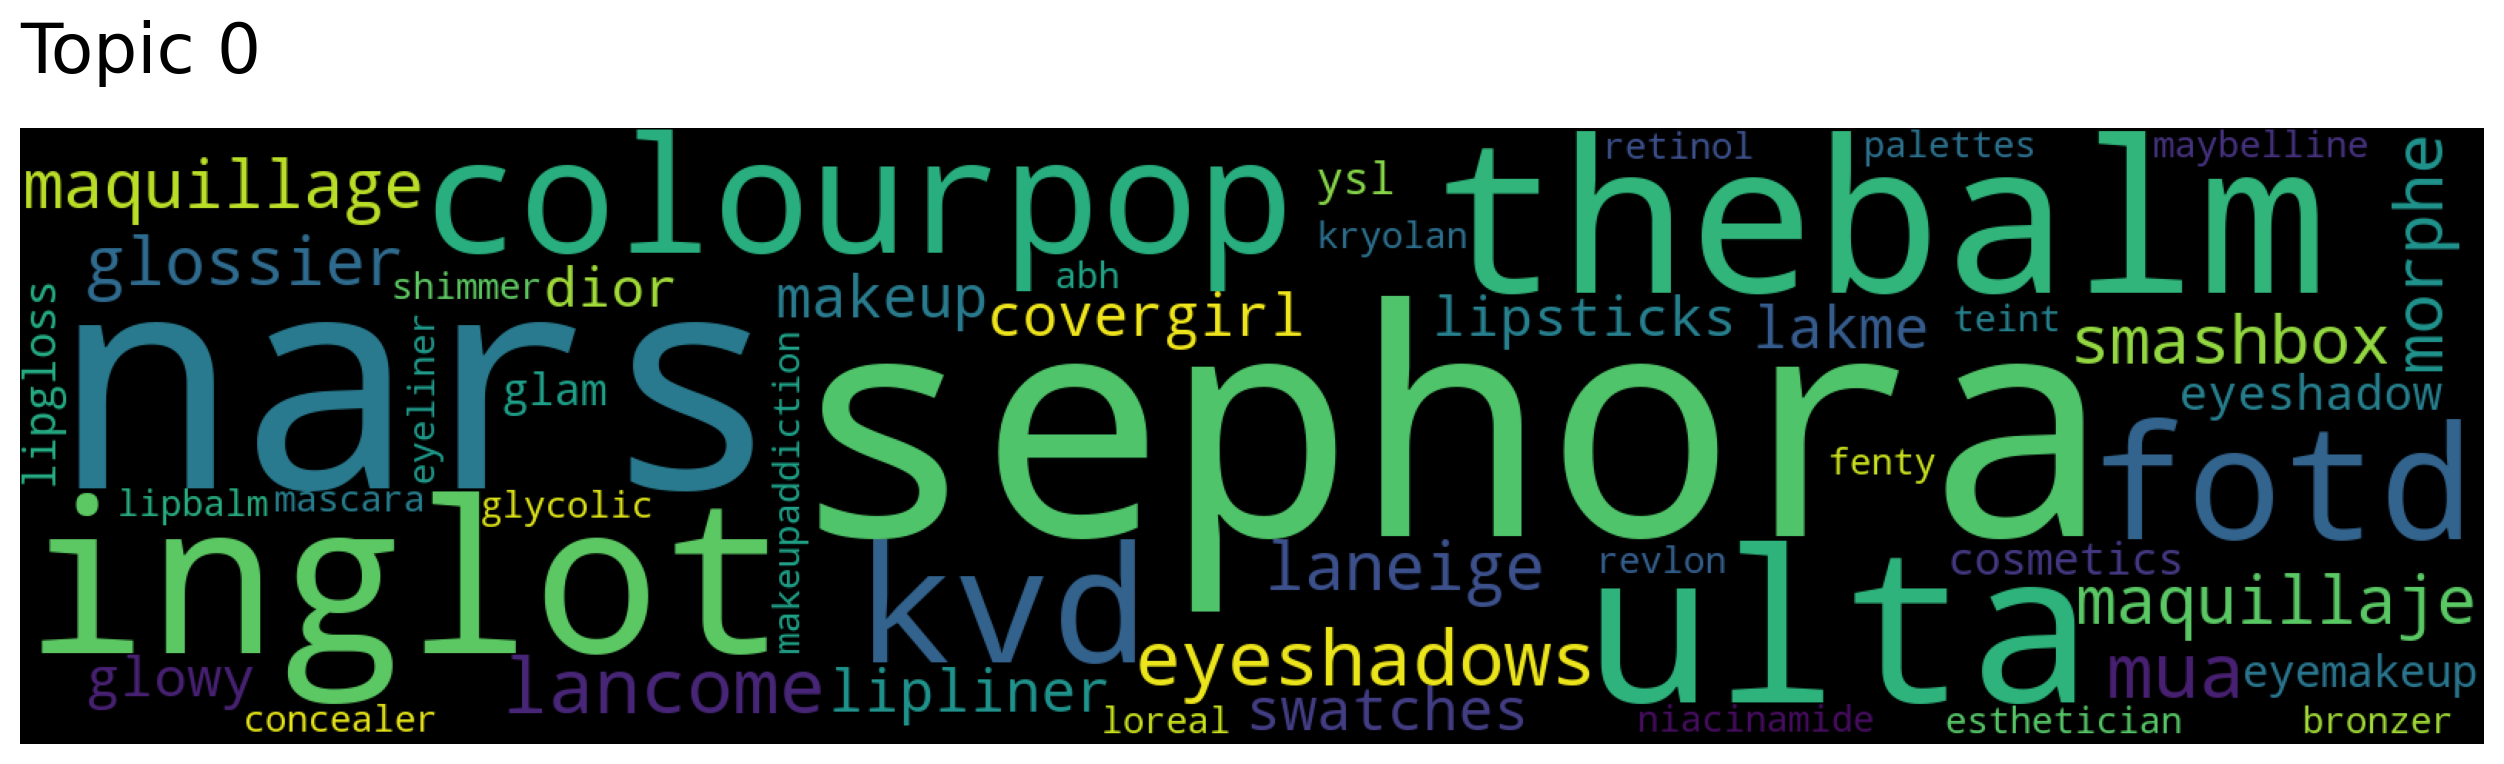

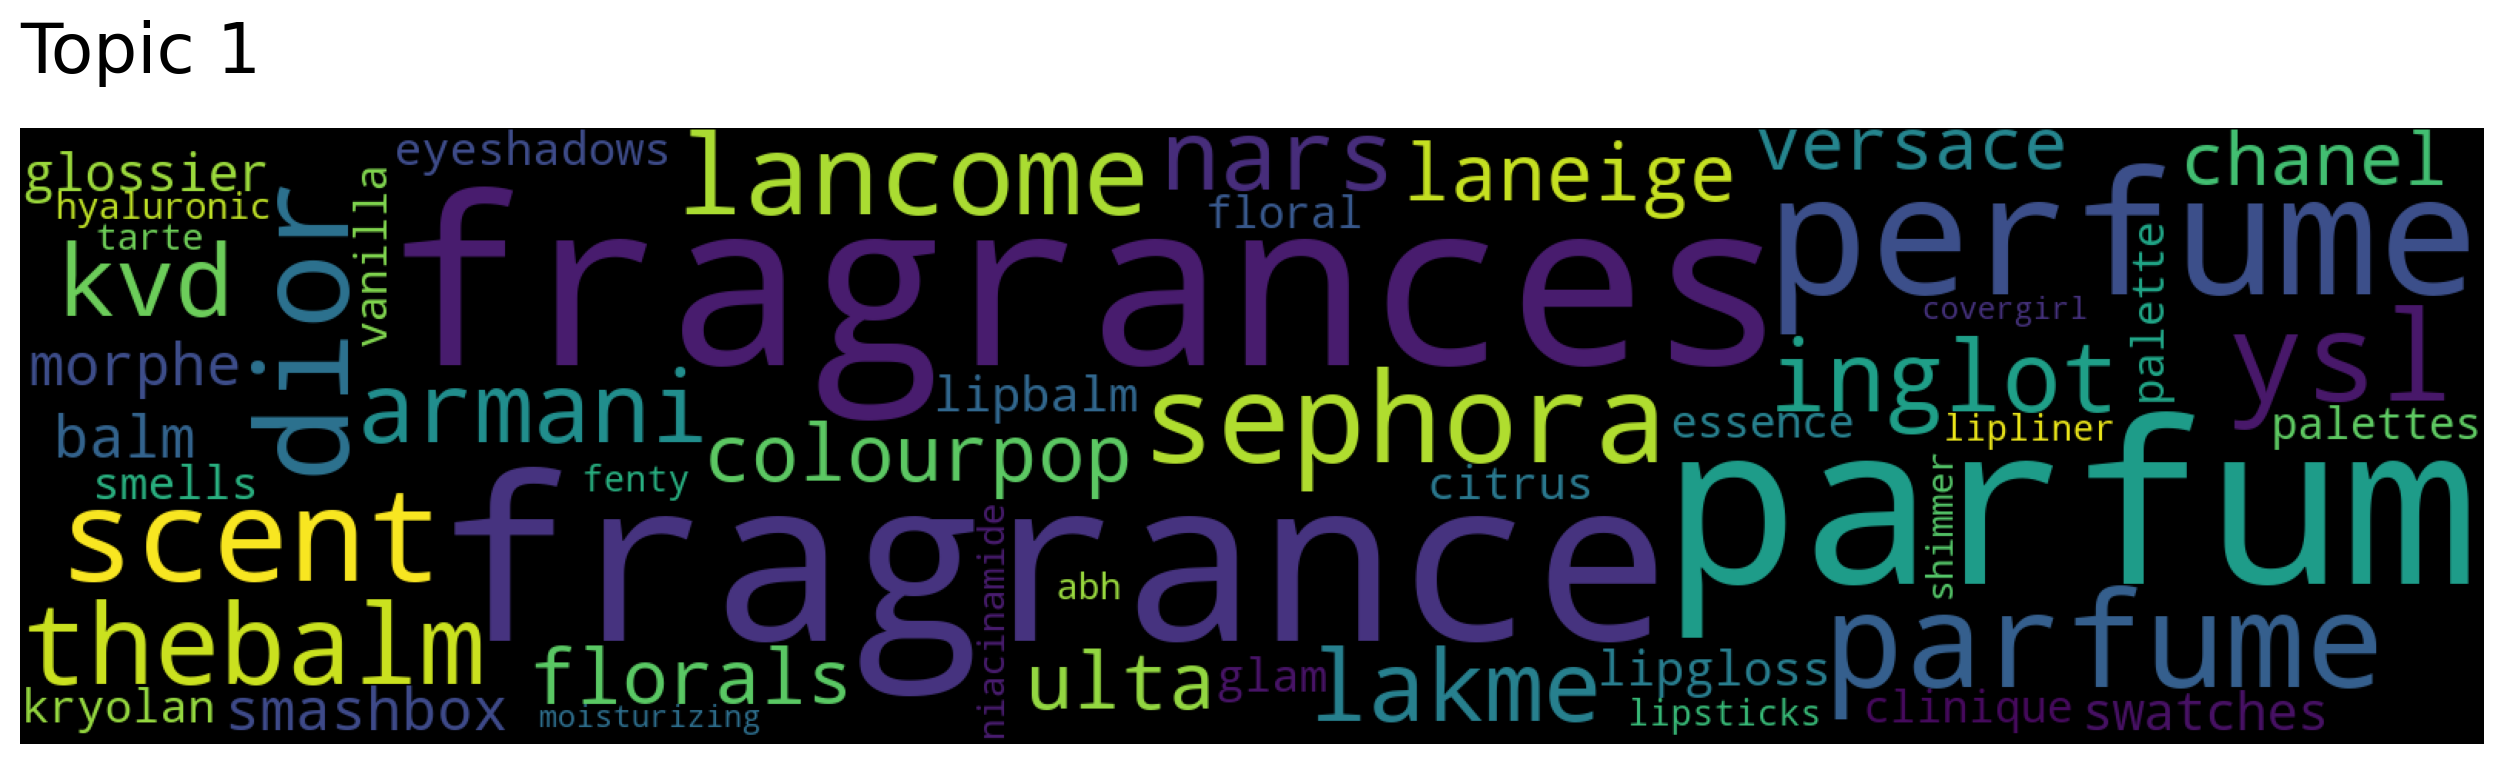

In [40]:
#topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["sephora"], num_topics=2)
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)

Similar words

In [41]:
# Similar words
words, word_scores = model.similar_words(keywords=["sephora"], keywords_neg=[], num_words=20)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")

ulta 0.7997855564288205
nars 0.6426060183686485
thebalm 0.6242332004984736
colourpop 0.6192354740209844
kvd 0.6169922300334832
inglot 0.589477737944531
lancome 0.587207371872724
eyeshadows 0.5780126243829029
maquillage 0.5769796848488002
smashbox 0.5688119626982138
macys 0.5485374612281371
covergirl 0.540731966861203
ysl 0.5340123163418192
mua 0.5316907326885185
swatches 0.5239224171365532
makeup 0.5216809466786125
dior 0.5128361397882962
nordstrom 0.5094781094153291
glossier 0.504503584055266
cosmetics 0.49624623793700423


Similar documents

In [42]:
# 10 documents similaires
documents, document_score, document_id = model.search_documents_by_topic(topic_num = 0, num_docs = 10)

In [43]:
for document, documentscore, documentid in zip(documents, document_score, document_id):
    print(documents)
    print(documentscore)
    print(documentid)
    print("-----------------------------------------------------------------")

['ℐ 𝒶𝓂 𝒶 𝓈𝓊𝒸𝓀𝑒𝓇 𝒻𝑜𝓇 𝒽𝒾𝑔𝒽𝓁𝒾𝑔𝒽𝓉𝑒𝓇𝓈.\n\n#motd #todayslook #makeupcollection #makeupcollector #makeupaddict #makeupjunkie #makeupforever #makeuplife #beauty #vanity #eyeshadow #makeup #lipstick #love #dressyourface #makeuphaul #sephora #ulta  #instamakeup #instalike #Sephora #Ulta #SephoraCollection #SephoraHaul #palette #VIBRouge #makeupdaily #beautypost #makeuplover #slaytheflatlay #CharlotteTilbury #charlottetilburymakeup'
 '𝒯𝑜𝒹𝒶𝓎’𝓈 𝓅𝒾𝒸𝓀𝓈.💄\n\n#motd #todayslook #makeupcollection #makeupcollector #makeupaddict #makeupjunkie #makeupforever #makeuplife #beauty #vanity #eyeshadow #makeup #lipstick #love #dressyourface #makeuphaul #sephora #ulta  #instamakeup #instalike #Sephora #Ulta #SephoraCollection #SephoraHaul #palette #VIBRouge #makeupdaily #beautypost #makeuplover #slaytheflatlay'
 'Evening glam for my bestie _martirosian 💓\n\n#glam_by_anna #makeup #makeupbyme #dailymakeup #glow #mua #style #beauty #hudabeauty #anastasiabeverlyhills #agamakeupartist #amrezy #dosofcolors #wakeupandmak